# Christmas recipes EDA
Data sourced from: [BBC Good Food](https://www.bbcgoodfood.com/) 

I ported from R to Python some ideas using examples from [This Kaggle Notebook. Thank you JONATHAN BOUCHET!](https://www.kaggle.com/code/jonathanbouchet/hmm-yummy) <br> <br>


***
![](banner.png )
***

Import necessary packages and read the json file

In [41]:
import pandas as pd
from matplotlib import pyplot
import seaborn as sns


recipes = pd.read_json("data/recipes.json.zip", lines=True)
recipes.head()

,Name,url,Description,Author,Ingredients,Method
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an..."
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che..."
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...


Let's get some info about the dataframe

In [42]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1617 non-null   object
 1   url          1617 non-null   object
 2   Description  1429 non-null   object
 3   Author       1611 non-null   object
 4   Ingredients  1617 non-null   object
 5   Method       1617 non-null   object
dtypes: object(6)
memory usage: 75.9+ KB


The dataframe has 6 columns and 1617 entries. Each recipe has a number of ingredients and a method with a number of instructions. Let's check the type of the elements in columns 'Ingredients' and 'Method'

In [43]:
print("The type of Ingredients is: ", type(recipes['Ingredients'][0]))
print("The type of Method is: ", type(recipes['Method'][0]))

The type of Ingredients is:  <class 'list'>
The type of Method is:  <class 'list'>


So there is a good chance we can add additional numerical data to dataframe like **number of ingredients** and **number of steps** in the instructions for each recipe. Let's try it

In [44]:
recipes["num_ingredients"] = recipes['Ingredients'].map(len)
recipes["num_instructions"] = recipes['Method'].map(len)
recipes.head()

,Name,url,Description,Author,Ingredients,Method,num_ingredients,num_instructions
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...,13,5
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an...",14,6
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che...",21,5
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...,14,7
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...,11,2


OK! Now we have additional numerical data. We can already start exploring and question some ideas. For example is there a correlation between  **num_gredients** and **num_instructions**. A good scatter plot can help visualise this relationship. Intuitively the answer is yes. More ingredients, more instructions. But let's see.

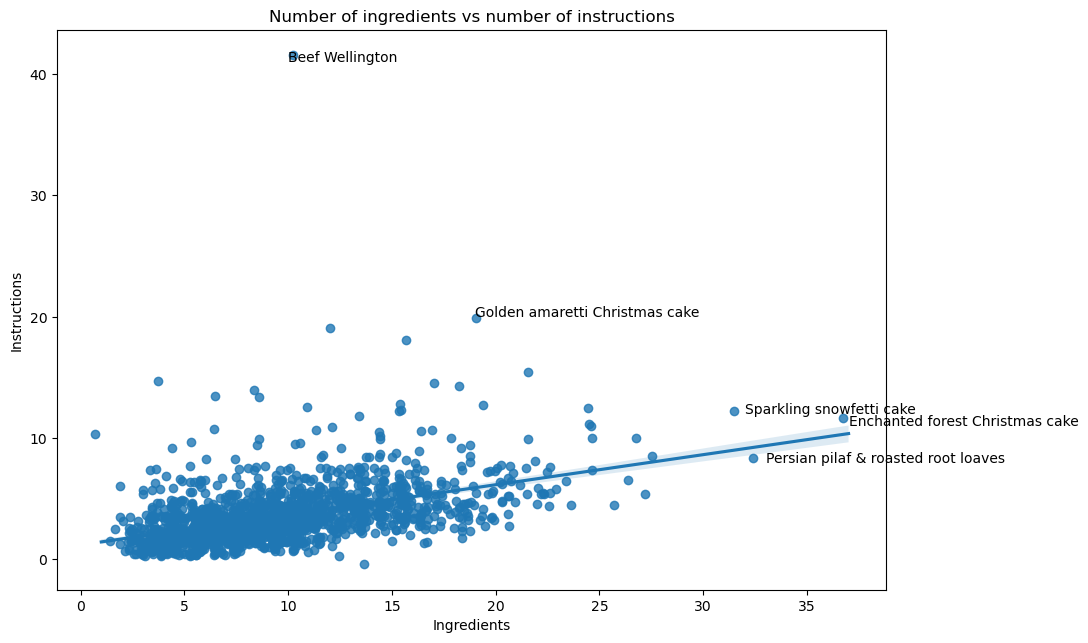

In [45]:
# Let's see if there's collinearity between number of ingredients and the number of instructions. Obviously there will be.
fig, ax = pyplot.subplots(figsize=(10.7, 7.27))
plot = sns.regplot(ax=ax, data=recipes, x='num_ingredients', y='num_instructions', x_jitter = 0.7, y_jitter = 0.7)
plot.set(title='Number of ingredients vs number of instructions', xlabel='Ingredients', ylabel='Instructions');

# Label recipes where the number of ingredients is >= 30 aor the number of instructions is >= 20. Sort of spotting outliers if there's any
outliers = recipes[(recipes['num_ingredients'] >= 30) | (recipes['num_instructions'] >= 20)][['Name', 'num_ingredients', 'num_instructions']]
for index, row in outliers.iterrows():
    plot.text(row['num_ingredients'], row['num_instructions'], row['Name'])


Hmmm **Beef Wellington** has over 40 instructions but less than 10 ingredients. In contrast, **Enchanted forest Christmas cake** has over 35 ingredients but just above 10 instructions. Also the graph clearly shows a positive correlation between the number of instructions and the number of ingredients as expected. <br><br>
OK. So far it is good set of data. There's much more we can do and explore. But what if we can get more information and how? Can we get nutrient quantities for each recipe? In source folder, I created a script that allowed me to scrap all the information about nutrients for each recipe. We have the links for each recipe. So let's scrap that extra info and save all in csv format the read the new data.


In [46]:
import ast
recipes = pd.read_csv("data/recipes.csv")
# A problem emerged when saving the new data as csv, the ingredients and method are saved as list literals. SO to get them back as list we need to re-evalute them as lists.
recipes['Ingredients'] = recipes['Ingredients'].apply(lambda s: list(ast.literal_eval(s)))
recipes['Method'] = recipes['Method'].apply(lambda s: list(ast.literal_eval(s)))

recipes.head()

,Name,url,Description,Author,Ingredients,Method,num_ingredients,num_instructions,kcal,fat(g),saturates(g),carbs(g),sugars(g),fibre(g),protein(g),salt(g)
0,Christmas pie,https://www.bbcgoodfood.com/recipes/2793/chris...,Combine a few key Christmas flavours here to m...,Mary Cadogan,"[2 tbsp olive oil, knob butter, 1 onion, finel...",[Heat oven to 190C/fan 170C/gas 5. Heat 1 tbsp...,13,5,454.0,28.0,10.0,29.0,6.0,4.0,19.0,0.90
1,Simmer-&-stir Christmas cake,https://www.bbcgoodfood.com/recipes/1160/simme...,An easy-to-make alternative to traditional Chr...,Mary Cadogan,"[175g butter, chopped, 200g dark muscovado sug...","[Put the butter, sugar, fruit, zests, juice an...",14,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/72622/chri...,These beautiful and classy little cakes make l...,Sara Buenfeld,"[200g dark muscovado sugar, 175g butter, chopp...","[Tip the sugar, butter, dried fruit, whole che...",21,5,833.0,29.0,9.0,139.0,125.0,3.0,9.0,0.44
3,Christmas buns,https://www.bbcgoodfood.com/recipes/1803633/ch...,Paul Hollywood's fruit rolls can be made ahead...,Paul Hollywood,"[500g strong white flour, plus extra for dusti...",[Put the flour and 1 tsp salt into a large bow...,14,7,455.0,9.0,5.0,89.0,47.0,3.0,9.0,0.65
4,Christmas cupcakes,https://www.bbcgoodfood.com/recipes/981634/chr...,"Made these for the second time today, and I ha...",Barney Desmazery,"[280g self-raising flour, 175g golden caster s...",[Heat oven to 190C/170 fan/gas 5 and line a 12...,11,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1617 entries, 0 to 1616
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              1617 non-null   object 
 1   url               1617 non-null   object 
 2   Description       1429 non-null   object 
 3   Author            1611 non-null   object 
 4   Ingredients       1617 non-null   object 
 5   Method            1617 non-null   object 
 6   num_ingredients   1617 non-null   int64  
 7   num_instructions  1617 non-null   int64  
 8   kcal              1543 non-null   float64
 9   fat(g)            1441 non-null   float64
 10  saturates(g)      1383 non-null   float64
 11  carbs(g)          1526 non-null   float64
 12  sugars(g)         1431 non-null   float64
 13  fibre(g)          1219 non-null   float64
 14  protein(g)        1456 non-null   float64
 15  salt(g)           1440 non-null   float64
dtypes: float64(8), int64(2), object(6)
memory 

So this is what we have now. Data is becoming reach of information including nutrients info for each recipe. Further meaningful analysis can be done. Some recipes however have missing info and the values have been set to **NaN**

In [48]:
# Find how many NaN we have in each column
print(recipes.isna().sum())

Name                  0
url                   0
Description         188
Author                6
Ingredients           0
Method                0
num_ingredients       0
num_instructions      0
kcal                 74
fat(g)              176
saturates(g)        234
carbs(g)             91
sugars(g)           186
fibre(g)            398
protein(g)          161
salt(g)             177
dtype: int64


In [49]:
# Let's drop rows where at least one element is missing.
recipes = recipes.dropna()
print(recipes.shape)

# Check if we're still having NaN values
print(recipes.isna().sum())



(927, 16)
Name                0
url                 0
Description         0
Author              0
Ingredients         0
Method              0
num_ingredients     0
num_instructions    0
kcal                0
fat(g)              0
saturates(g)        0
carbs(g)            0
sugars(g)           0
fibre(g)            0
protein(g)          0
salt(g)             0
dtype: int64


So this is it for now. I may create another notebook or keep adding more stuff here exploring things, analysing relationships like regression, testing inferences about data, possibly clustering now that we have more numbers in data. The new csv file is available in the source forlder. One is plain csv **recipes.csv** and the other is in zipped format **recipes.zip**. I also kept the original Jason files.